# Project: Financial inclusion in 4 african countries
- Countries: Uganda, Kenya, Tanzania, Rwanda
- Data source: Zindi (link?)

## Import python libraries

In [2]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

#from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score, recall_score

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

RSEED = 42

## Data Inspection

In [3]:
#load data from csv file in data folder as dataframe
df = pd.read_csv('data/Train.csv')

In [4]:
# inspect the head of the dataframe
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
# make statistical analysis on dataframe
df.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [6]:
# get information about column data type, completeness of column data, size of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [7]:
# Check for missing values
print('missing values:', df.isnull().sum())


missing values: country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


We don't have missing data in our dataset.

<AxesSubplot:xlabel='bank_account', ylabel='count'>

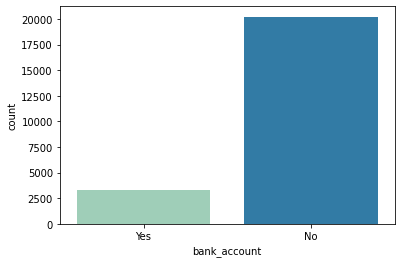

In [8]:
# check if target (if someone has a bank account or not) is balanced
sns.countplot(data=df,x='bank_account',palette="YlGnBu")

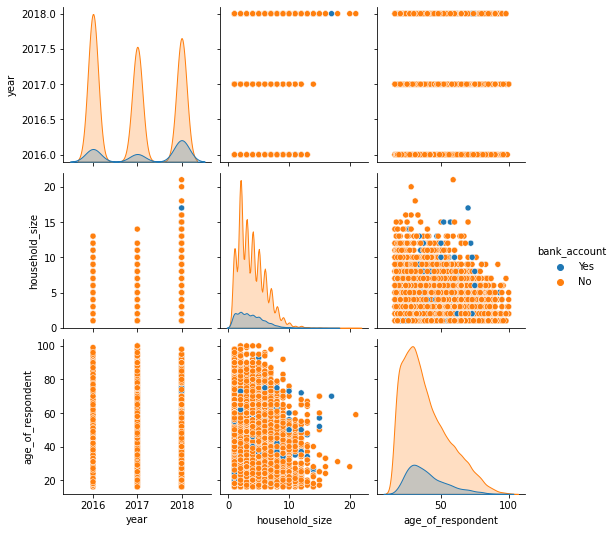

In [9]:
# plot pairwise scatter plots for each numeric or categoric feature (features with string categories will not be plotted)
sns.pairplot(df, hue='bank_account')

In [10]:
# check balance of data per year
df.year.value_counts()

2016    8735
2018    8169
2017    6620
Name: year, dtype: int64

In [11]:
# check balance of data per country
df.country.value_counts()

Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: country, dtype: int64

In [14]:
# calculate percentage of persons with bank account
bank = df.bank_account.value_counts()
per_bank = (bank[1])/(bank[0]+bank[1])
print(f'Percentage of people with bank account:' ,round(per_bank*100,2),'%')

Percentage of people with bank account: 14.08 %


In [15]:
# count individuals in rural and urban location
df.location_type.value_counts()

Rural    14343
Urban     9181
Name: location_type, dtype: int64

In [16]:
df.cellphone_access.value_counts()

Yes    17454
No      6070
Name: cellphone_access, dtype: int64

In [17]:
df.job_type.value_counts()

Self employed                   6437
Informally employed             5597
Farming and Fishing             5441
Remittance Dependent            2527
Other Income                    1080
Formally employed Private       1055
No Income                        627
Formally employed Government     387
Government Dependent             247
Dont Know/Refuse to answer       126
Name: job_type, dtype: int64

In [68]:
#Percentatge of job_type on total data set
per = df.job_type.value_counts()
per = round(per/23524,2)
per

Self employed                   0.27
Informally employed             0.24
Farming and Fishing             0.23
Remittance Dependent            0.11
Other Income                    0.05
Formally employed Private       0.04
No Income                       0.03
Formally employed Government    0.02
Government Dependent            0.01
Dont Know/Refuse to answer      0.01
Name: job_type, dtype: float64

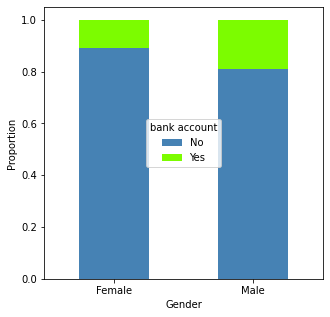

In [18]:
# Create a dataframe with the counts by job type and user/non user
gender_counts_df = df.groupby(["gender_of_respondent", "bank_account"])['gender_of_respondent'].count().unstack()
gender_user_percents_df = gender_counts_df.T.div(gender_counts_df.T.sum()).T
fig, ax = plt.subplots()

gender_user_percents_df.plot(kind="bar", stacked=True, color=["steelblue", "lawngreen"],figsize=(5,5), ax=ax)

ax.set_xlabel("Gender")
ax.set_xticklabels(["Female", "Male"], rotation=0)
ax.set_ylabel("Proportion")

ax.legend(title="bank account",loc='center')

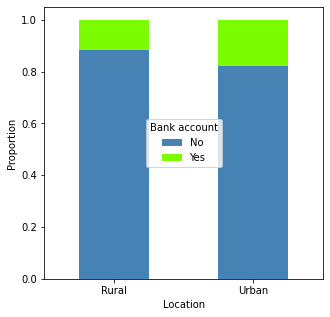

In [60]:
# Create a dataframe with the counts by job type and user/non user
loc_counts_df = df.groupby(["location_type", "bank_account"])['location_type'].count().unstack()
loc_user_percents_df = loc_counts_df.T.div(loc_counts_df.T.sum()).T
fig, ax = plt.subplots()

loc_user_percents_df.plot(kind="bar", stacked=True, color=["steelblue", "lawngreen"],figsize=(5,5), ax=ax)

ax.set_xlabel("Location")
ax.set_xticklabels(["Rural", "Urban"], rotation=0)
ax.set_ylabel("Proportion")

ax.legend(title="Bank account",loc='center')

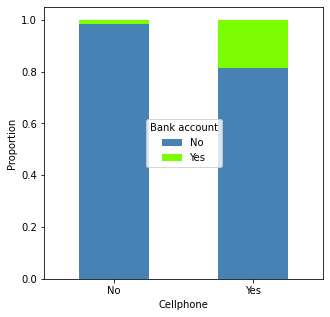

In [62]:
# Create a dataframe with the counts by job type and user/non user
cell_counts_df = df.groupby(["cellphone_access", "bank_account"])['cellphone_access'].count().unstack()
cell_user_percents_df = cell_counts_df.T.div(cell_counts_df.T.sum()).T
fig, ax = plt.subplots()

cell_user_percents_df.plot(kind="bar", stacked=True, color=["steelblue", "lawngreen"],figsize=(5,5), ax=ax)

ax.set_xlabel("Cellphone")
ax.set_xticklabels(["No", "Yes"], rotation=0)
ax.set_ylabel("Proportion")

ax.legend(title="Bank account",loc='center')

In [19]:
# Create a dataframe with the counts by job type and user/non user
job_counts_df = df.groupby(["job_type", "bank_account"])["job_type"].count().unstack().sort_values('Yes')
job_counts_df

bank_account,No,Yes
job_type,,
No Income,614,13
Dont Know/Refuse to answer,112,14
Government Dependent,197,50
Other Income,884,196
Remittance Dependent,2287,240
Formally employed Government,87,300
Informally employed,5152,445
Formally employed Private,484,571
Farming and Fishing,4806,635


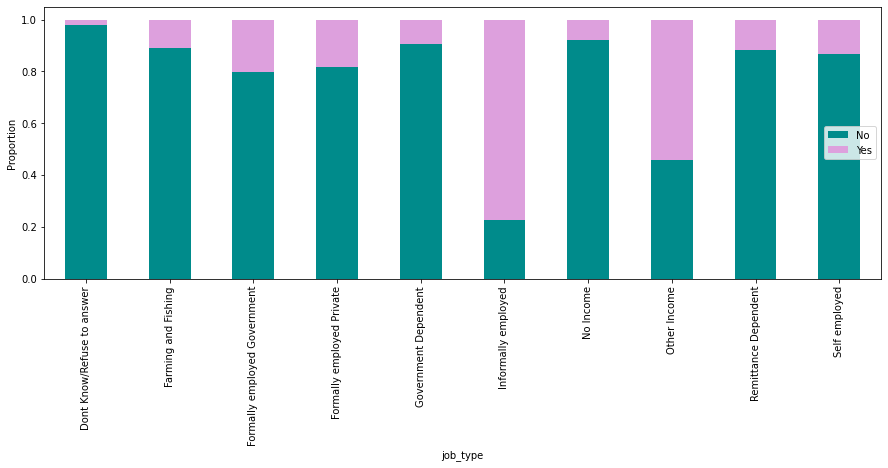

In [59]:
# Use the same counts df, adding up to 1
from numpy import sort


job_user_percents_df = job_counts_df.T.div(job_counts_df.T.sum()).T
#
fig, ax = plt.subplots()

job_user_percents_df.plot(kind="bar", stacked=True,color=["darkcyan", "plum"], figsize=(15,5), ax=ax)

ax.set_xlabel("job_type")
ax.set_xticklabels(["Dont Know/Refuse to answer", "Farming and Fishing", "Formally employed Government",	
    "Formally employed Private", "Government Dependent", "Informally employed", "No Income", "Other Income",
    "Remittance Dependent", "Self employed"], rotation=90)
ax.set_ylabel("Proportion")

ax.legend(loc='center right')

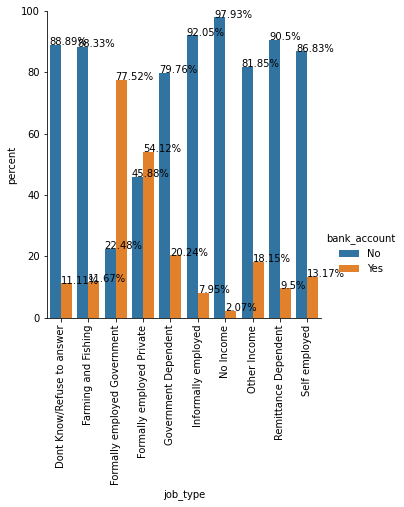

In [21]:
#
x,y = 'job_type', 'bank_account'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
plt.xticks(rotation=90);
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [22]:
# Create a dataframe with the counts by job titel und bank account
counts_df = df.groupby(["country", "bank_account"])["country"].count().unstack()
counts_df

bank_account,No,Yes
country,,
Kenya,4547,1521
Rwanda,7732,1003
Tanzania,6013,607
Uganda,1920,181


In [23]:
country_percents_df = counts_df.div(counts_df.sum()).T
# Use the same counts df
user_percents_df = counts_df.T.div(counts_df.T.sum()).T
user_percents_df

bank_account,No,Yes
country,,
Kenya,0.749341,0.250659
Rwanda,0.885175,0.114825
Tanzania,0.908308,0.091692
Uganda,0.913851,0.086149


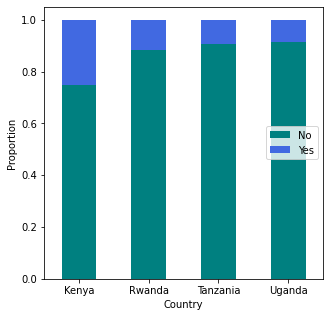

In [24]:
fig, ax = plt.subplots()

user_percents_df.plot(kind="bar", stacked=True, color=["teal", "royalblue"],figsize=(5,5), ax=ax)

ax.set_xlabel("Country")
ax.set_xticklabels(["Kenya", "Rwanda",	"Tanzania",	"Uganda"], rotation=0)
ax.set_ylabel("Proportion")

ax.legend(#handles=color_patches,
    loc='center right')

Text(0, 0.5, 'Proportion')

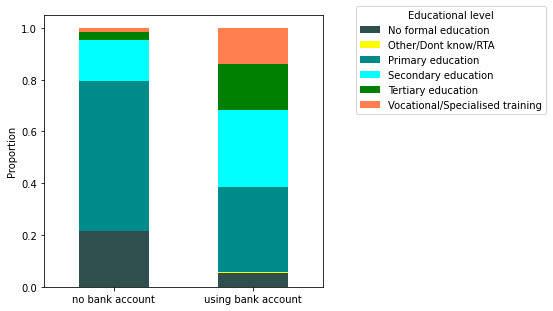

In [25]:
# Create a dataframe with the counts by education level und bank account
edu_counts_df = df.groupby(["education_level", "bank_account"])["education_level"].count().unstack()
edu_percents_df = edu_counts_df.div(edu_counts_df.sum()).T
fig, ax = plt.subplots()

edu_percents_df.plot(kind="bar", stacked=True, color=["darkslategrey", "yellow", "darkcyan", "aqua", "green", "coral"],figsize=(5,5), ax=ax)


ax.legend(bbox_to_anchor=(1.1, 1.05), title="Educational level")
ax.set_xticklabels(["no bank account", "using bank account"], rotation=0)
ax.set_xlabel("")
ax.set_ylabel("Proportion")

## Prepare data for modelling

In [26]:
# drop unused columns: year, country, uniqueid and define target (y) and features (X)
y = df.bank_account
X = df.drop(['bank_account','uniqueid','year'],axis=1)
X.head()



,country,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [27]:
#split data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RSEED,stratify=y,test_size=0.3)
X_train.head()

,country,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
5037,Kenya,Urban,No,6,18,Male,Child,Single/Never Married,Primary education,Other Income
12649,Rwanda,Rural,No,3,59,Male,Head of Household,Married/Living together,No formal education,Farming and Fishing
16973,Tanzania,Urban,Yes,1,51,Male,Head of Household,Married/Living together,Primary education,Informally employed
14772,Rwanda,Urban,Yes,1,48,Female,Head of Household,Widowed,Primary education,Other Income
12533,Rwanda,Rural,Yes,9,36,Female,Spouse,Married/Living together,Primary education,Informally employed


In [28]:
# use label encoding to transform string categories into integers
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
# fit transform target on train data and transform on test data
y_train =le.fit_transform(y_train)
y_test = le.transform(y_test)
#list of features for encoder
cat_predictor = list(X_train.columns)
cat_predictor.remove("household_size")
cat_predictor.remove("age_of_respondent")
#print(cat_predictor)

#label encoding of the feature columns
for predictor in cat_predictor:
    X_train[(predictor)] = le.fit_transform(X_train[(predictor)])
    X_test[(predictor)] = le.transform(X_test[(predictor)])
X_train.head()

,country,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
5037,0,1,0,6,18,1,0,3,2,7
12649,1,0,0,3,59,1,1,2,0,1
16973,2,1,1,1,51,1,1,2,2,5
14772,1,1,1,1,48,0,1,4,2,7
12533,1,0,1,9,36,0,5,2,2,5


## Baseline model

### Zero R baseline

- strongly imbalanced data should use the Zero R baseline (ZeroR predicts always the majority class)

In [29]:
#dummy classifier as baseline (Zero Rule)
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy='most_frequent') # most frequent = predicting always the majority class (ZeroR)
dummy_clf.fit(X_train,y_train)
y_pred = dummy_clf.predict(X_test)
print('F1-score on test:', round(f1_score(y_test,y_pred),2))
print('Recall on test:', round(recall_score(y_test,y_pred),2))
print('Accuracy on test:', round(accuracy_score(y_test,y_pred),2))

print(classification_report(y_test,y_pred))

F1-score on test: 0.0
Recall on test: 0.0
Accuracy on test: 0.86
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      6064
           1       0.00      0.00      0.00       994

    accuracy                           0.86      7058
   macro avg       0.43      0.50      0.46      7058
weighted avg       0.74      0.86      0.79      7058



- The accuracy of the Zero R baseline is 0.86, further models must beat this score. But, as we want to predict the minority class, we will take a second baseline model as reference

### Non algorithmic baseline

In [67]:
#non-algorithmic baseline model
def my_baseline(x):
    ''' 
    this function is checking if an individual is having cellphone access and is living in urban areas
    if True, it predicts 1 for having a bank account
    Input: dataframe
    Output: array of predicted values
    '''
    selection = (X_test['cellphone_access'] == 1) & (X_test['location_type'] == 1) 
    #print(selection)
    y_pred = le.fit_transform(selection)
    return y_pred   

y_pred = my_baseline(X_test)

print('F1-score on test:', round(f1_score(y_test,y_pred),2))
print('Recall on test:', round(recall_score(y_test,y_pred),2))
print('Accuracy on test:', round(accuracy_score(y_test,y_pred),2))
print(classification_report(y_test,y_pred))

F1-score on test: 0.34
Recall on test: 0.5
Accuracy on test: 0.72
              precision    recall  f1-score   support

           0       0.90      0.76      0.83      6064
           1       0.26      0.50      0.34       994

    accuracy                           0.72      7058
   macro avg       0.58      0.63      0.58      7058
weighted avg       0.81      0.72      0.76      7058



- this baseline model is worse at predicting the majority class (no bank account) as the previous model (Zero R), but better in predicting the minority class

## Model 1: Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
rf_clf = RandomForestClassifier(n_estimators=100, 
                               random_state=RSEED, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

# Fit on training data
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test) 

print('F1-score on test:', round(f1_score(y_test,y_pred),2))
print('Recall on test:', round(recall_score(y_test,y_pred),2))
print('Accuracy on test:', round(accuracy_score(y_test,y_pred),2))
print(classification_report(y_test,y_pred))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s


F1-score on test: 0.45
Recall on test: 0.39
Accuracy on test: 0.87
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      6064
           1       0.53      0.39      0.45       994

    accuracy                           0.87      7058
   macro avg       0.72      0.67      0.69      7058
weighted avg       0.85      0.87      0.86      7058



[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


## Model 2: AdaBoost Classifier

In [32]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(random_state=RSEED)
ada_clf.fit(X_train,y_train)
y_pred = ada_clf.predict(X_test)

print('F1-score on test:', round(f1_score(y_test,y_pred),2))
print('Recall on test:', round(recall_score(y_test,y_pred),2))
print('Accuracy on test:', round(accuracy_score(y_test,y_pred),2))
print(classification_report(y_test,y_pred))

F1-score on test: 0.46
Recall on test: 0.35
Accuracy on test: 0.88
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      6064
           1       0.67      0.35      0.46       994

    accuracy                           0.88      7058
   macro avg       0.79      0.66      0.70      7058
weighted avg       0.87      0.88      0.87      7058



## Model 3: XGBoost Classifier

In [33]:
#XGB
from xgboost import XGBClassifier
xg_clf = XGBClassifier()
xg_clf.fit(X_train,y_train)
y_pred = xg_clf.predict(X_test)

print('F1-score on test:', round(f1_score(y_test,y_pred),2))
print('Recall on test:', round(recall_score(y_test,y_pred),2))
print('Accuracy on test:', round(accuracy_score(y_test,y_pred),2))
print(classification_report(y_test,y_pred))

F1-score on test: 0.49
Recall on test: 0.39
Accuracy on test: 0.89
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      6064
           1       0.65      0.39      0.49       994

    accuracy                           0.89      7058
   macro avg       0.78      0.68      0.71      7058
weighted avg       0.87      0.89      0.87      7058



## Model 4: Support Vector Classifier

In [34]:
#standard vector classifier
from sklearn.svm import SVC

svc_clf = SVC(kernel='rbf',C=1000)
svc_clf.fit(X_train, y_train)
y_pred = svc_clf.predict(X_test)

print('F1-score on test:', round(f1_score(y_test,y_pred),2))
print('Recall on test:', round(recall_score(y_test,y_pred),2))
print('Accuracy on test:', round(accuracy_score(y_test,y_pred),2))
print(classification_report(y_test,y_pred))

F1-score on test: 0.31
Recall on test: 0.2
Accuracy on test: 0.88
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      6064
           1       0.71      0.20      0.31       994

    accuracy                           0.88      7058
   macro avg       0.80      0.59      0.62      7058
weighted avg       0.86      0.88      0.84      7058



## Hyperparameter Tuning for the two best performing models

### Random Forest

In [35]:
# Hyperparameter grid
param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Estimator for use in random search
estimator = RandomForestClassifier(random_state = RSEED)

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'recall', cv = 5, 
                        n_iter=15,
                        random_state=RSEED,
                        verbose = 5)

# Fit 
rs.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 2/5] END bootstrap=False, max_depth=13, max_features=0.6, max_leaf_nodes=36, min_samples_split=10, n_estimators=48;, score=0.298 total time=   0.8s
[CV 1/5] END bootstrap=False, max_depth=13, max_features=0.6, max_leaf_nodes=36, min_samples_split=10, n_estimators=48;, score=0.278 total time=   0.9s
[CV 3/5] END bootstrap=False, max_depth=13, max_features=0.6, max_leaf_nodes=36, min_samples_split=10, n_estimators=48;, score=0.259 total time=   0.9s
[CV 4/5] END bootstrap=False, max_depth=13, max_features=0.6, max_leaf_nodes=36, min_samples_split=10, n_estimators=48;, score=0.287 total time=   0.8s
[CV 5/5] END bootstrap=False, max_depth=13, max_features=0.6, max_leaf_nodes=36, min_samples_split=10, n_estimators=48;, score=0.302 total time=   0.9s
[CV 3/5] END bootstrap=False, max_depth=17, max_features=0.5, max_leaf_nodes=18, min_samples_split=10, n_estimators=149;, score=0.218 total time=   2.1s
[CV 5/5] END bootstrap=Fal

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 3, 3, 4, 4, 4, 5,
                                                      5, 5, 6, 6, 6, 7, 7, 7, 8,
                                                      8, 8, 9, 9, 9, 10, 10, 10,
                                                      11, 11, 12, 12, 12, ...],
                                        'max_features': ['auto', 'sqrt', None,
                                                         0.5, 0.6, 0.7,
                                                         0.7999999999999999,
                                                         0.8999999999999999],
                                        'max_leaf_nodes': [None, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 10,
                          

Best parameters: {'n_estimators': 153, 'min_samples_split': 5, 'max_leaf_nodes': 40, 'max_features': None, 'max_depth': 14, 'bootstrap': True}
F1-score on test: 0.47
Recall on test: 0.35
Accuracy on test: 0.89
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      6064
           1       0.71      0.35      0.47       994

    accuracy                           0.89      7058
   macro avg       0.80      0.66      0.70      7058
weighted avg       0.87      0.89      0.87      7058



<AxesSubplot:>

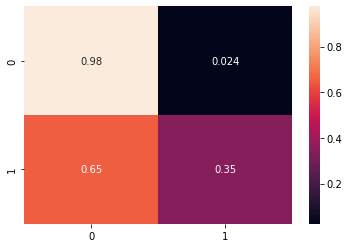

In [36]:
# Best parameters
print('Best parameters:', rs.best_params_)
# Assigning the fitted 
rf_best = rs.best_estimator_

# Making predictions on the test set with best parameters
y_pred = rf_best.predict(X_test)

print('F1-score on test:', round(f1_score(y_test,y_pred),2))
print('Recall on test:', round(recall_score(y_test,y_pred),2))
print('Accuracy on test:', round(accuracy_score(y_test,y_pred),2))
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred,normalize='true')
sns.heatmap(cm, annot=True)

### XGBooster

In [37]:
# Defining parameter grid (as dictionary)
param_grid = {  "learning_rate"    : [ 0.20, 0.25, 0.30 ] ,
                'min_child_weight': [1, 2],
                'gamma': [0.5, 1, 1.5],
                'subsample': [0.6, 0.8, 1.0],
                'colsample_bytree': [0.6, 0.8, 1.0],
                'max_depth': [ 5, 6, 8]
            
             }

# Instantiate gridsearch and define the metric to optimize 
rs = RandomizedSearchCV(XGBClassifier(), param_grid, scoring='recall',
                  cv=5, verbose=5, n_jobs=-1,n_iter=15,random_state=RSEED);

# Fit gridsearch object to data
rs.fit(X_train, y_train);

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END colsample_bytree=0.8, gamma=1, learning_rate=0.3, max_depth=6, min_child_weight=2, subsample=0.8;, score=0.369 total time=   1.9s
[CV 2/5] END colsample_bytree=0.8, gamma=1, learning_rate=0.3, max_depth=6, min_child_weight=2, subsample=0.8;, score=0.404 total time=   1.9s
[CV 3/5] END colsample_bytree=0.8, gamma=1, learning_rate=0.3, max_depth=6, min_child_weight=2, subsample=0.8;, score=0.337 total time=   2.0s
[CV 4/5] END colsample_bytree=1.0, gamma=1, learning_rate=0.3, max_depth=6, min_child_weight=1, subsample=0.6;, score=0.384 total time=   2.4s
[CV 2/5] END colsample_bytree=1.0, gamma=1, learning_rate=0.3, max_depth=6, min_child_weight=1, subsample=0.6;, score=0.404 total time=   2.4s
[CV 5/5] END colsample_bytree=1.0, gamma=1, learning_rate=0.3, max_depth=6, min_child_weight=1, subsample=0.6;, score=0.377 total time=   2.4s
[CV 1/5] END colsample_bytree=1.0, gamma=1, learning_rate=0.3, max_depth=6, min_c

Best parameters: {'subsample': 0.8, 'min_child_weight': 1, 'max_depth': 8, 'learning_rate': 0.25, 'gamma': 0.5, 'colsample_bytree': 0.8}
F1-score on test: 0.48
Recall on test: 0.4
Accuracy on test: 0.88
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      6064
           1       0.60      0.40      0.48       994

    accuracy                           0.88      7058
   macro avg       0.76      0.68      0.71      7058
weighted avg       0.86      0.88      0.87      7058



<AxesSubplot:>

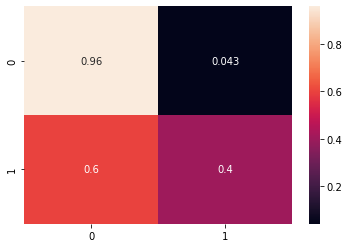

In [38]:
# Best parameters
print('Best parameters:', rs.best_params_)
# Assigning the fitted 
xgb_best = rs.best_estimator_

# Making predictions on the test set with best parameters
y_pred = xgb_best.predict(X_test)

print('F1-score on test:', round(f1_score(y_test,y_pred),2))
print('Recall on test:', round(recall_score(y_test,y_pred),2))
print('Accuracy on test:', round(accuracy_score(y_test,y_pred),2))
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred,normalize='true')
sns.heatmap(cm, annot=True)

## Resampling
- With strongly imbalanced data, resampling can be useful, although it might lead to overfitting. We are using a combination of the SMOTE and the Tomek algorithm to balance the target variable. 

In [39]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [40]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(sampling_strategy='minority')
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)

F1-score on test: 0.49
Recall on test: 0.69
Accuracy on test: 0.8
              precision    recall  f1-score   support

           0       0.94      0.82      0.87      6064
           1       0.38      0.69      0.49       994

    accuracy                           0.80      7058
   macro avg       0.66      0.75      0.68      7058
weighted avg       0.86      0.80      0.82      7058



<AxesSubplot:>

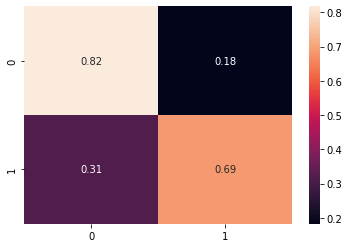

In [41]:
#SMOTETomek+XGB
xg_clf = XGBClassifier()
xg_clf.fit(X_train_smt ,y_train_smt)
y_pred = xg_clf.predict(X_test)

print('F1-score on test:', round(f1_score(y_test,y_pred),2))
print('Recall on test:', round(recall_score(y_test,y_pred),2))
print('Accuracy on test:', round(accuracy_score(y_test,y_pred),2))
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred,normalize='true')
sns.heatmap(cm, annot=True)